## Support Vector Machines and Kernels 

### Introduction 
We will be using the wine quality data set.  This data set contains various chemical properties of wine, such as acidity, sugar, pH and alcohol.  It also contains a quality metric (3-9, with highest being better) and a color (red or white).  The name of the file is `Wine_Quality_Data.csv`. 

In [3]:
from __future__ import print_function 
import os 

data_path = ['C:/Users/japor/Desktop/Machine Learning 501 Nervana/Intel-ML101-Class7/data']

### Question 1
* Import the data 
* Create the target variable `y` as a 1 or 0 column where 1 means red. 
* Create a `pairplot` for the dataset. 
* Create a bar plot showing the correlations between each column and `y`
* Pick the 2 most correlated fields (using the absolute value of correlations) and create `X`
* Use `MinMaxScaler` to scale `X`. Note that this will output a `np.array`. Make it a DataFrame again and rename the columns appropriately 


In [4]:
import pandas as pd 
import numpy as np 

filepath = os.sep.join(data_path + ['Wine_Quality_Data.csv'])
data = pd.read_csv(filepath, sep = ',')

In [3]:
data.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


In [4]:
data.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [5]:
# astype() casts a pandas object to a specified dtype
y = (data['color'] == 'red').astype(int) # casts 'red' rows as integer 1

fields = list(data.columns[:-1]) # list of X column names 

# correlations between X features and y 
correlations = data[fields].corrwith(y)
correlations.sort_values(inplace = True) 

In [6]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: color, dtype: int32

In [6]:
correlations

total_sulfur_dioxide   -0.700357
free_sulfur_dioxide    -0.471644
residual_sugar         -0.348821
citric_acid            -0.187397
quality                -0.119323
alcohol                -0.032970
pH                      0.329129
density                 0.390645
fixed_acidity           0.486740
sulphates               0.487218
chlorides               0.512678
volatile_acidity        0.653036
dtype: float64

In [1]:
import matplotlib.pyplot as plt 
import seaborn as sns 
% matplotlib inline 

sns.set_context('talk')
sns.set_palette('dark')
sns.set_style('white')

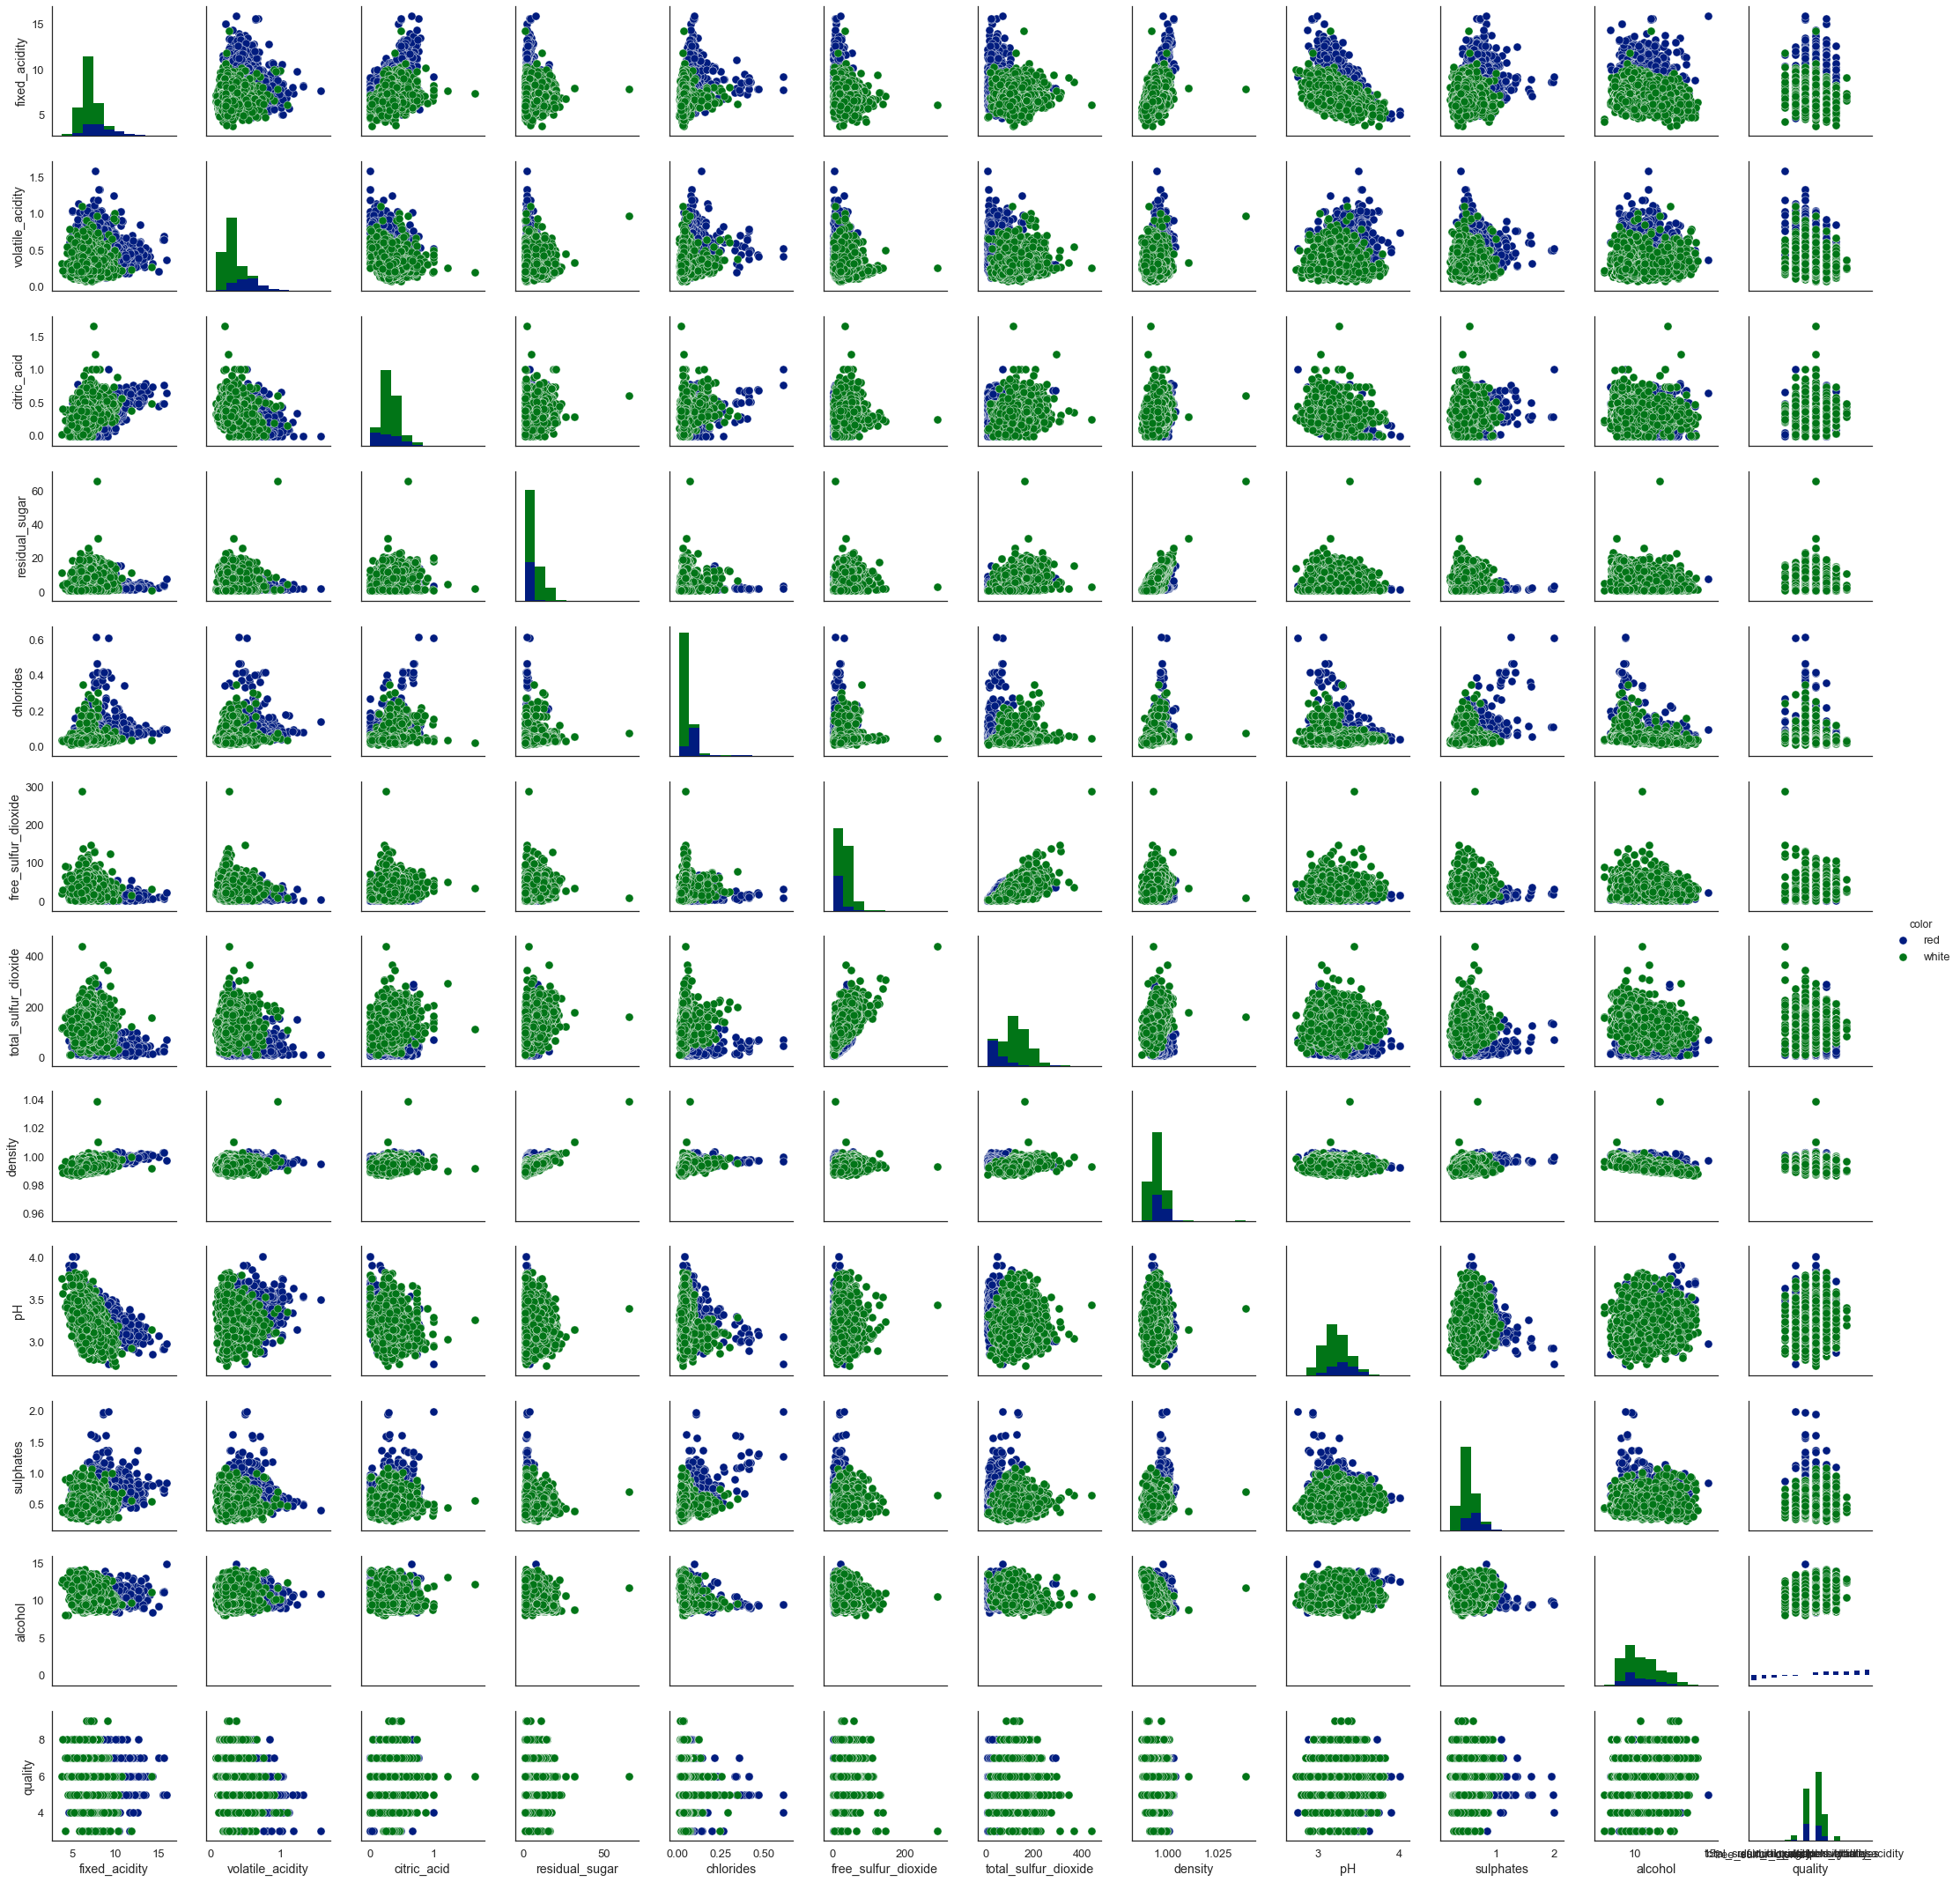

In [7]:
sns.pairplot(data, hue = 'color')
ax = correlations.plot(kind = 'bar')
#ax.set(ylim = [-1,1], ylabel = 'pearson correlation'); # ylim limits y-axis

In [8]:
from sklearn.preprocessing import MinMaxScaler

# take absolute value and sort correlation values 
correlations.map(abs).sort_values()

alcohol                 0.032970
quality                 0.119323
citric_acid             0.187397
pH                      0.329129
residual_sugar          0.348821
density                 0.390645
free_sulfur_dioxide     0.471644
fixed_acidity           0.486740
sulphates               0.487218
chlorides               0.512678
volatile_acidity        0.653036
total_sulfur_dioxide    0.700357
dtype: float64

In [9]:
# 2 most correlated fields 
fields = correlations.map(abs).sort_values().iloc[-2:].index
fields

Index(['volatile_acidity', 'total_sulfur_dioxide'], dtype='object')

In [10]:
# X is 2 most correlated fields 
X = data[fields]

scaler = MinMaxScaler()
X = scaler.fit_transform(X)
X

array([[ 0.41333333,  0.06451613],
       [ 0.53333333,  0.140553  ],
       [ 0.45333333,  0.11059908],
       ..., 
       [ 0.10666667,  0.24193548],
       [ 0.14      ,  0.23963134],
       [ 0.08666667,  0.21198157]])

In [11]:
# convert np.array into dataframe
X = pd.DataFrame(X, columns = ['%s_scaled' % fld for fld in fields])
X.columns 

X.head()

,volatile_acidity_scaled,total_sulfur_dioxide_scaled
0,0.413333,0.064516
1,0.533333,0.140553
2,0.453333,0.110599
3,0.133333,0.124424
4,0.413333,0.064516


### Question 2 
The goal for this question is to look at the decision boundary of a `LinearSVC` classifier on tihs dataset. Check out [this example](http://scikit-learn.org/stable/auto_examples/svm/plot_iris.html#sphx-glr-auto-examples-svm-plot-iris-py) in sklearn's documentation. 
* Fit a Linear Support Vector Machine Classifier to `X, y`. 
* Pick 300 samples from `X`. Get the corresponding `y` value. Store them in variables `X_color` and `y_color`. This is because original dataset is too large and it produces a crowded plot. 
* Modify `y_color` so that it has the value 'red' instead of 1 and 'yellow' instead of 0. 
* Scatterplot `X_color` columns. Use the keyword argument `color = y_color` to color code samples. 
* Use the code snippet below to plot the decision surface in a color coded way. 

`x_axis, y_axis = np.arange(0,1,0.005), np.arange(0,1,0.005)
xx, yy = np.meshgrid(x_axis, y_axis)
xx_ravel = xx.ravel()
yy_ravel = yy.ravel()
X_grid = pd.DataFrame([xx_ravel, yy_ravel]).T
y_grid_predictions = *[YOUR MODEL]*.predict(X_grid)
y_grid_predictions = y_grid_predictions, cmap = plt.cm.autumn_r, alpha = 0.3)`

Feel free to experiment with different parameter choices for Linear SVC and see the decision boundary. 

In [12]:
from sklearn.svm import LinearSVC

# Fit Linear SVC to data 
LSVC = LinearSVC()
LSVC.fit(X, y) 

X_color = X.sample(300, random_state = 45) 
X_color.index

Int64Index([2691, 5843, 5509, 2880, 3286, 1341,  736, 6436, 1360, 2672,
            ...
            3191, 3650, 5930, 4945,  167,  358, 5724, 1552, 5746,   64],
           dtype='int64', length=300)

In [13]:
X_color.head()

,volatile_acidity_scaled,total_sulfur_dioxide_scaled
2691,0.086667,0.345622
5843,0.186667,0.253456
5509,0.193333,0.306452
2880,0.126667,0.373272
3286,0.120000,0.435484


In [14]:
y_color = y.loc[X_color.index]
y_color.head()

2691    0
5843    0
5509    0
2880    0
3286    0
Name: color, dtype: int32

In [15]:
# change to 'red if y = 1, 'yellow' if y = 0
y_color = y_color.map(lambda r: 'red' if r == 1 else 'yellow') 
y_color.head()

2691    yellow
5843    yellow
5509    yellow
2880    yellow
3286    yellow
Name: color, dtype: object

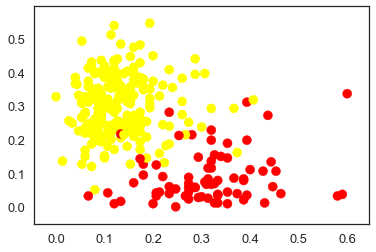

In [16]:
ax = plt.axes()
ax.scatter(X_color.iloc[:, 0], X_color.iloc[:,1], 
           color = y_color, alpha = 1); 

In [17]:
## Plot decision surface in a color coded way  
x_axis, y_axis = np.arange(0, 1.005, 0.005), np.arange(0, 1.005, 0.005)

# meshgrid creates a rectangular grid out of an array of x and y values 
# x =   0 0 0 0 0        y =   0 1 2 3 4
#       1 1 1 1 1              0 1 2 3 4
#       2 2 2 2 2              0 1 2 3 4
#       3 3 3 3 3              0 1 2 3 4
#       4 4 4 4 4              0 1 2 3 4
xx, yy = np.meshgrid(x_axis, y_axis)
xx

array([[ 0.   ,  0.005,  0.01 , ...,  0.99 ,  0.995,  1.   ],
       [ 0.   ,  0.005,  0.01 , ...,  0.99 ,  0.995,  1.   ],
       [ 0.   ,  0.005,  0.01 , ...,  0.99 ,  0.995,  1.   ],
       ..., 
       [ 0.   ,  0.005,  0.01 , ...,  0.99 ,  0.995,  1.   ],
       [ 0.   ,  0.005,  0.01 , ...,  0.99 ,  0.995,  1.   ],
       [ 0.   ,  0.005,  0.01 , ...,  0.99 ,  0.995,  1.   ]])

In [18]:
yy

array([[ 0.   ,  0.   ,  0.   , ...,  0.   ,  0.   ,  0.   ],
       [ 0.005,  0.005,  0.005, ...,  0.005,  0.005,  0.005],
       [ 0.01 ,  0.01 ,  0.01 , ...,  0.01 ,  0.01 ,  0.01 ],
       ..., 
       [ 0.99 ,  0.99 ,  0.99 , ...,  0.99 ,  0.99 ,  0.99 ],
       [ 0.995,  0.995,  0.995, ...,  0.995,  0.995,  0.995],
       [ 1.   ,  1.   ,  1.   , ...,  1.   ,  1.   ,  1.   ]])

In [19]:
xx_ravel = xx.ravel()
yy_ravel = yy.ravel()
xx_ravel

array([ 0.   ,  0.005,  0.01 , ...,  0.99 ,  0.995,  1.   ])

In [20]:
X_grid = pd.DataFrame([xx_ravel, yy_ravel]).T
X_grid.head()

,0,1
0,0.000,0.0
1,0.005,0.0
2,0.010,0.0
3,0.015,0.0
4,0.020,0.0


In [21]:
X_grid.shape

(40401, 2)

In [22]:
y_grid_predictions = LSVC.predict(X_grid)
y_grid_predictions

array([1, 1, 1, ..., 0, 0, 0])

In [23]:
# reshape() ravels array then reshapes it to 201 x 201 array (xx.shape)
y_grid_predictions = y_grid_predictions.reshape(xx.shape)
y_grid_predictions

array([[1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [0, 1, 1, ..., 1, 1, 1],
       ..., 
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [24]:
xx.shape

(201, 201)

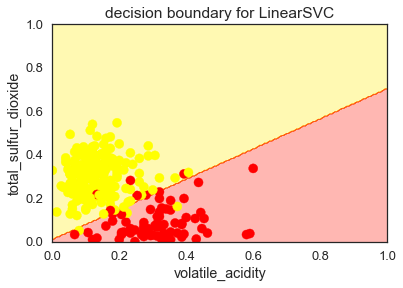

In [25]:
ax = plt.axes()
ax.contourf(xx, yy, y_grid_predictions, cmap = plt.cm.autumn_r, alpha = 0.3)
ax.scatter(X_color.iloc[:, 0], X_color.iloc[:, 1], color = y_color, alpha = 1)
ax.set(xlabel = fields[0], 
       ylabel = fields[1], 
       xlim = [0,1], 
       ylim = [0,1], 
       title = 'decision boundary for LinearSVC');

In [26]:
# C = 1000
LSVC_2 = LinearSVC(C = 100000)
LSVC_2.fit(X, y)

y_grid_predictions = LSVC_2.predict(X_grid)
y_grid_predictions = y_grid_predictions.reshape(xx.shape)

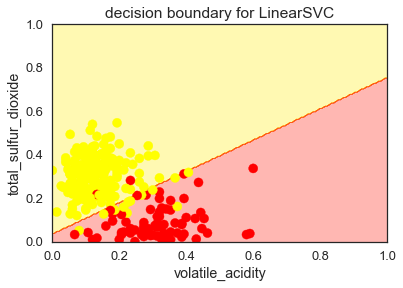

In [27]:
ax2 = plt.axes()
ax2.contourf(xx, yy, y_grid_predictions, cmap = plt.cm.autumn_r, alpha = 0.3)
ax2.scatter(X_color.iloc[:, 0], X_color.iloc[:, 1], color = y_color, alpha = 1)
ax2.set(xlabel = fields[0], 
       ylabel = fields[1], 
       xlim = [0,1], 
       ylim = [0,1], 
       title = 'decision boundary for LinearSVC');

### Question 3
Let's now fit a Gaussian kernel SVC and see how the decision boundary changes. 
* Consolidate the code snippets in Question 2 into one function which takes in an estimator, `X` and `y`, and produces the final plot with decision boundary. The steps are: 
    1. Fit model 
    2. Get sample 300 records from `X` and the corresponding `y`'s
    3. Create grid, predict, plot using `ax.contourf`
    4. Add on the scatterplot
* After copying and pasting code, make sure the finished function uses your input `estimator` and not the `LinearSVC` model you built. 
* For the following values of `gamma`, create a Gaussian Kernal SVC and plot the decision boundary. 
<center>`gamma = [0.5, 1, 2, 10]`</center>
* Holding `gamma` constant, for various values of `C`, plot the decision boundary. You may try 
<center>`Cs = [0.1, 1, 10]`</center>

In [28]:
def plot_decision_boundary(estimator, X, y): 
    
    # fit data using classifier 
    estimator.fit(X, y) 
    
    # sample 300 from data, get corresponding y with .index
    X_color = X.sample(300, random_state = 42)
    y_color = y.loc[X_color.index]
    
    # convert to 'red of value = 1
    y_color = y_color.map(lambda r: 'red' if r == 1 else 'yellow')
    
    # create rectangular grid out of an array of x and y values 
    x_axis, y_axis = np.arange(0, 1, 0.005), np.arange(0, 1, 0.005)
    xx, yy = np.meshgrid(x_axis, y_axis)
    
    # unravel array
    xx_ravel = xx.ravel() 
    yy_ravel = yy.ravel() 
    
    # coordinates of grid ax x, y (x & y are 2 most correlated features)
    X_grid = pd.DataFrame([xx_ravel, yy_ravel]).T
    
    # prediction at each value of X_grid (this is the decision boundary)
    y_grid_predictions = estimator.predict(X_grid)
    y_grid_predictions = y_grid_predictions.reshape(xx.shape)
    
    # plot scatter and decision boundary
    fig, ax = plt.subplots(figsize = (5,5))
    ax.contourf(xx, yy, y_grid_predictions, cmap = plt.cm.autumn_r, alpha = 0.3)
    ax.scatter(X_color.iloc[:, 0], X_color.iloc[:,1], color = y_color, alpha = 1)
    ax.set(xlabel = fields[0], ylabel = fields[1], title = str(estimator))

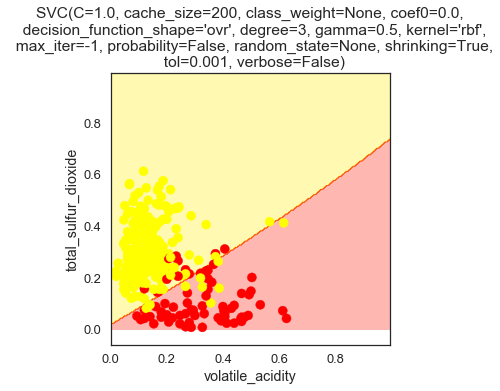

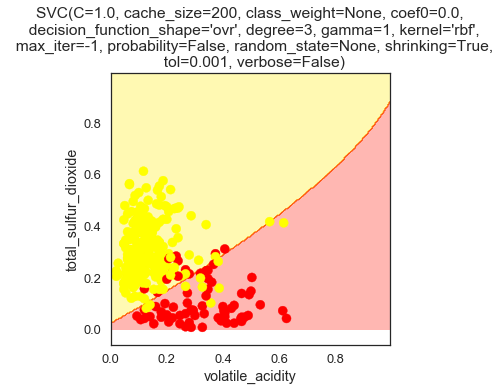

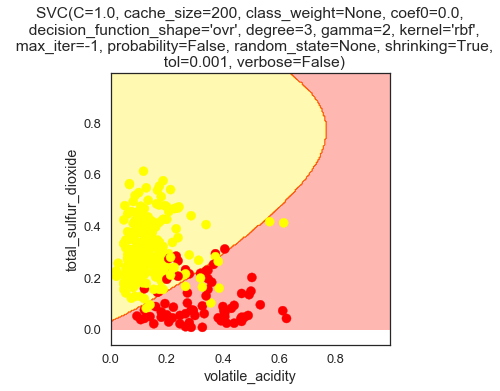

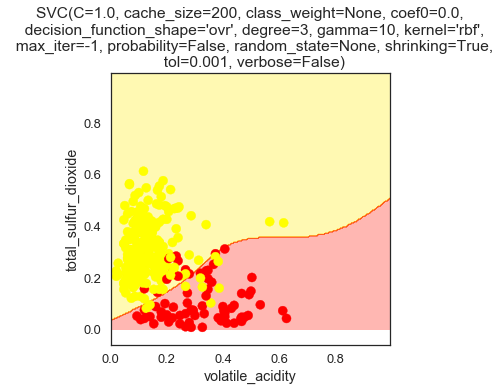

In [29]:
from sklearn.svm import SVC

# gamma defines how far the influence of a single training example reaches 
# large gamma means decision boundary depends on points close to decision boundary (overfitting)
# lower gamma means decision boundary depends on points far away from decision boundary (underfitting)
gammas = [0.5, 1, 2, 10]
for gamma in gammas: 
    SVC_Gaussian = SVC(kernel = 'rbf', gamma = gamma) 
    plot_decision_boundary(SVC_Gaussian, X, y)


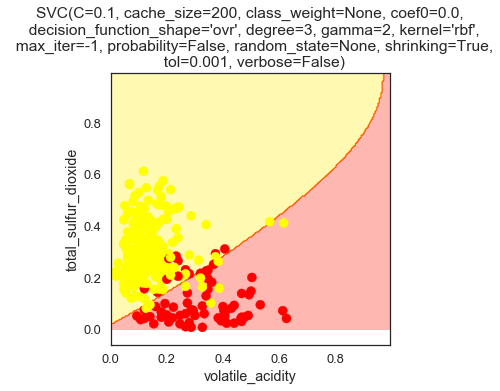

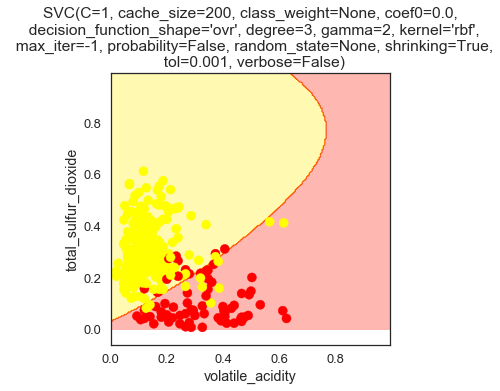

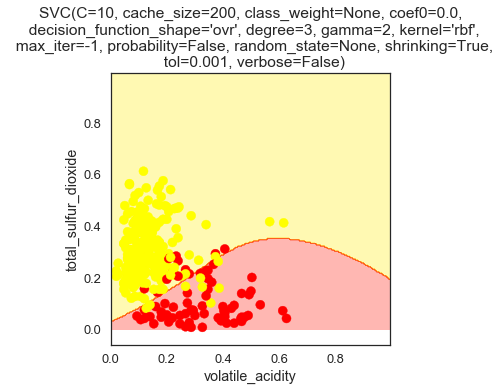

In [30]:
# C controls tradeoff between classification of training examples and smoothness
# of decision boundary
# large C means choosing more data points as support vectors (overfitting)
# lower C means choosing fewer data points as support vectors (underfitting)
Cs = [0.1, 1, 10]
for C in Cs: 
    SVC_Gaussian = SVC(kernel = 'rbf', gamma = 2, C = C)
    plot_decision_boundary(SVC_Gaussian, X, y)
    

### Question 3A
Let's now fit a Polynomial kernel SVC with degree 3 and see how the decision boundary changes. 
* Use the plot decision boundary function from the previous question and try the Polynomial Kernel SVC 
* For various values of `C`, plot the decision boundary. You may try `Cs = [10, 20, 100, 200]`
* Try to find out a `C` value that gives the best possible decision boundary 

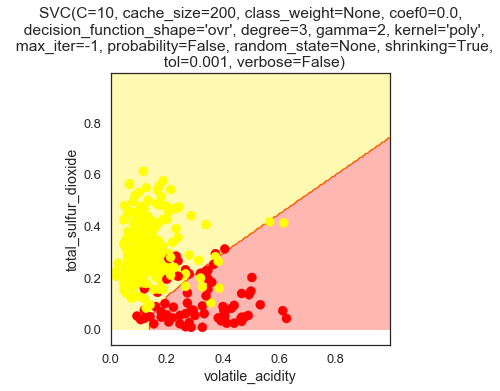

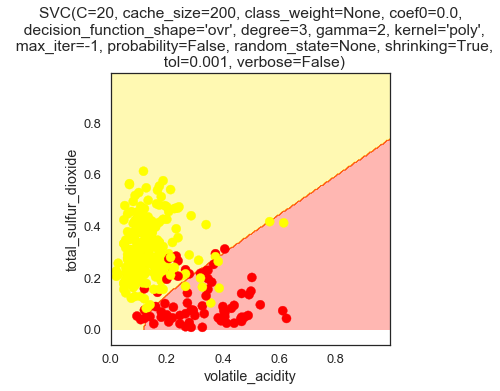

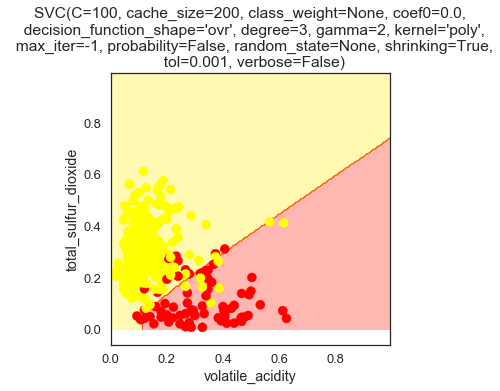

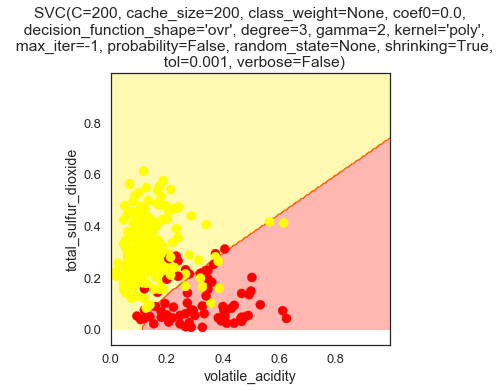

In [31]:
Cs = [10, 20, 100, 200] 
for C in Cs: 
    SVC_poly = SVC(kernel = 'poly', degree = 3, gamma = 2, C = C)
    plot_decision_boundary(SVC_poly, X, y)
    

### Question 4 
In this question, we will compare the fitting times between SVC vs Nystroem with rbf kernel. 

Jupyter Notebooks provide a useful magic function `%timeit` which executes a line and prints out the time it took to fit. If you type `%%timeit` in the beginning of the cell, then it will run the whole cell and output the running time. 
* Re-load the wine quality data if you made changes to the original. 
* Create `y` from `data.color`, and `X` from the rest of the columns. 
* Use `%%timeit` to get the time for fitting an SVC with rbf kernel. 
* Use `%%timeit` to get the time for the following: `fit_transform` the data with Nystroem and then fit a `SGDClassifier`.

Nystroem + SGD will take much shorter to fit. This difference will be more pronounced if the dataset was bigger. 
* Make 5 copies of `X` and concatenate them 
* Make 5 copies of `y` and concatenate them
* Compare the time it takes to fit both methods above


In [32]:
from sklearn.kernel_approximation import Nystroem
from sklearn.svm import SVC 
from sklearn.linear_model import SGDClassifier

y = data.color == 'red' # mask of True if red, False if not red 
X = data[data.columns[:-1]] # all columns except color 

kwargs = {'kernel': 'rbf'}
svc = SVC(**kwargs)
nystroem = Nystroem(**kwargs)
sgd = SGDClassifier()



C:\Users\japor\Anaconda2\envs\idp\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:84: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


In [33]:
%%timeit # note `%%timeit` needs to go before ANY comments

# SVC with rbf kernel
svc.fit(X, y)

2.06 s ± 141 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


Nystroem is a general method for low-rank approximations of kernels. It achieves this by essentially subsampling the data on which the kernel is evaluated. (http://scikit-learn.org/stable/modules/kernel_approximation.html#nystroem-kernel-approx)

In [34]:
%%timeit 

# Nystroem + SGD  
# (Nystroem approximates a kernel map using a subset of the training data.)
X_transformed = nystroem.fit_transform(X)
sgd.fit(X_transformed, y)


107 ms ± 10.7 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [35]:
# Increasing the dataset size (x5)
X2 = pd.concat([X]*5)
y2 = pd.concat([y]*5)

print(X2.shape)
print(y2.shape)

(32485, 12)
(32485,)


In [36]:
# SVC with rbf kernel on 5x dataset 
%timeit svc.fit(X2, y2)

40.6 s ± 618 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [37]:
%%timeit 

# Nystroem + SGD on 5x dataset 
X2_transformed = nystroem.fit_transform(X2)
sgd.fit(X2_transformed, y2)

440 ms ± 9.61 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


### Question 5 
Try tuning hyper-parameters for the svm kernel using `GridSearchCV()`
* Take the complete dataset 
* Define `y` as `data.color = 'red'`
* Remaining columns as `X`
* Do a test and train split 
* Set parameters for cross validation. Do this for as many values of gamma and C 
* Using `GridSearchCV` to run through the data using the various parameters values 
* Get the mean and standard deviation on the set for the various combination of gamma and C values 
* Print the best parameters in the training set


In [38]:
from sklearn import preprocessing

y = data.color == 'red'
lb = preprocessing.LabelBinarizer()
y = pd.DataFrame(data = lb.fit_transform(y), columns = ['color'])
y

,color
0,1
1,1
2,1
3,1
4,1
5,1
6,1
7,1
8,1
9,1


In [39]:
# Train, test split 
from sklearn.model_selection import train_test_split

X_train, X_test ,y_train, y_test = train_test_split(X, y, test_size = 0.3,
                                                   random_state = 42) 

In [40]:
# Tune hyper parameters for Gaussian SVC  
from sklearn.model_selection import GridSearchCV

svc = SVC(kernel = 'rbf')
linsvc = LinearSVC()
parameters = {'C': np.logspace(-3,4, num = 8), # C = [1e-3,..., 1e4]
              'gamma': np.logspace(-3,4, num = 8)} # gamma same as C 
C = {'C': np.logspace(-3,4, num =8)}

cv = GridSearchCV(svc, param_grid = parameters, cv = 4)
cv_lin = GridSearchCV(linsvc, param_grid = C, cv = 4)

In [41]:
scaler = MinMaxScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), 
                              columns = X_train.columns)
X_test_scaled = pd.DataFrame(scaler.fit_transform(X_test), 
                             columns = X_test.columns)

In [42]:
X_train_scaled.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,0.516949,0.273333,0.186992,0.027607,0.129568,0.123711,0.322485,0.148255,0.023622,0.125000,0.231405,0.500000
1,0.330508,0.133333,0.284553,0.225460,0.078073,0.206186,0.328402,0.244650,0.417323,0.159091,0.264463,0.333333
2,0.661017,0.263333,0.325203,0.012270,0.136213,0.034364,0.065089,0.191440,0.259843,0.244318,0.336088,0.500000
3,0.330508,0.066667,0.276423,0.032209,0.094684,0.096220,0.153846,0.146327,0.496063,0.318182,0.628099,0.500000
4,0.322034,0.113333,1.000000,0.061350,0.043189,0.343643,0.852071,0.059186,0.228346,0.119318,0.842975,0.500000


In [43]:
cv.fit(X_train_scaled, y_train.values.ravel())

GridSearchCV(cv=4, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': array([  1.00000e-03,   1.00000e-02,   1.00000e-01,   1.00000e+00,
         1.00000e+01,   1.00000e+02,   1.00000e+03,   1.00000e+04]), 'gamma': array([  1.00000e-03,   1.00000e-02,   1.00000e-01,   1.00000e+00,
         1.00000e+01,   1.00000e+02,   1.00000e+03,   1.00000e+04])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [44]:
cv.best_params_

{'C': 1000.0, 'gamma': 0.10000000000000001}

In [45]:
y_predict = cv.predict(X_test_scaled)

In [46]:
from sklearn.metrics import accuracy_score 

ac = accuracy_score(y_test, y_predict)
ac

0.29589743589743589

Gaussian SVC yields 29% accuracy, which is poor, I will try linear SVC to see if that improves prediction accuracy

In [47]:
# Tune hyperparameters for Linear SVC 
cv_lin.fit(X_train_scaled, y_train.values.ravel())

GridSearchCV(cv=4, error_score='raise',
       estimator=LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': array([  1.00000e-03,   1.00000e-02,   1.00000e-01,   1.00000e+00,
         1.00000e+01,   1.00000e+02,   1.00000e+03,   1.00000e+04])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [48]:
cv_lin.best_params_ 

{'C': 10.0}

In [49]:
y_predict_linsvc = cv_lin.predict(X_test_scaled)

ac_linsvc = accuracy_score(y_test, y_predict)
ac

0.29589743589743589

### Question 6 
Use the model from previous question to predict 
* Perform the prediction on the test set 
* Print confusion matrix, accuracy and classification report 

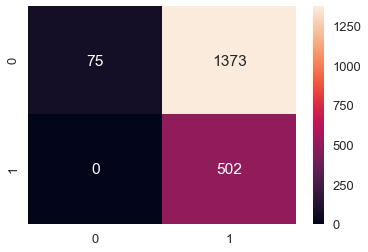

In [50]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

cm = confusion_matrix(y_test, y_predict)
sns.heatmap(cm, annot = True, fmt = 'd'); 

In [51]:
report = classification_report(y_test, y_predict)
print(report)

             precision    recall  f1-score   support

          0       1.00      0.05      0.10      1448
          1       0.27      1.00      0.42       502

avg / total       0.81      0.30      0.18      1950

